In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-data-set/bank_marketing_dataset.csv


In [4]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs,make_moons
from yellowbrick.cluster import KElbowVisualizer
import time
from matplotlib.colors import ListedColormap
from joblib import dump, load

In [5]:
df = pd.read_csv("/kaggle/input/bank-marketing-data-set/bank_marketing_dataset.csv")

In [6]:
df.shape

(41188, 21)

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


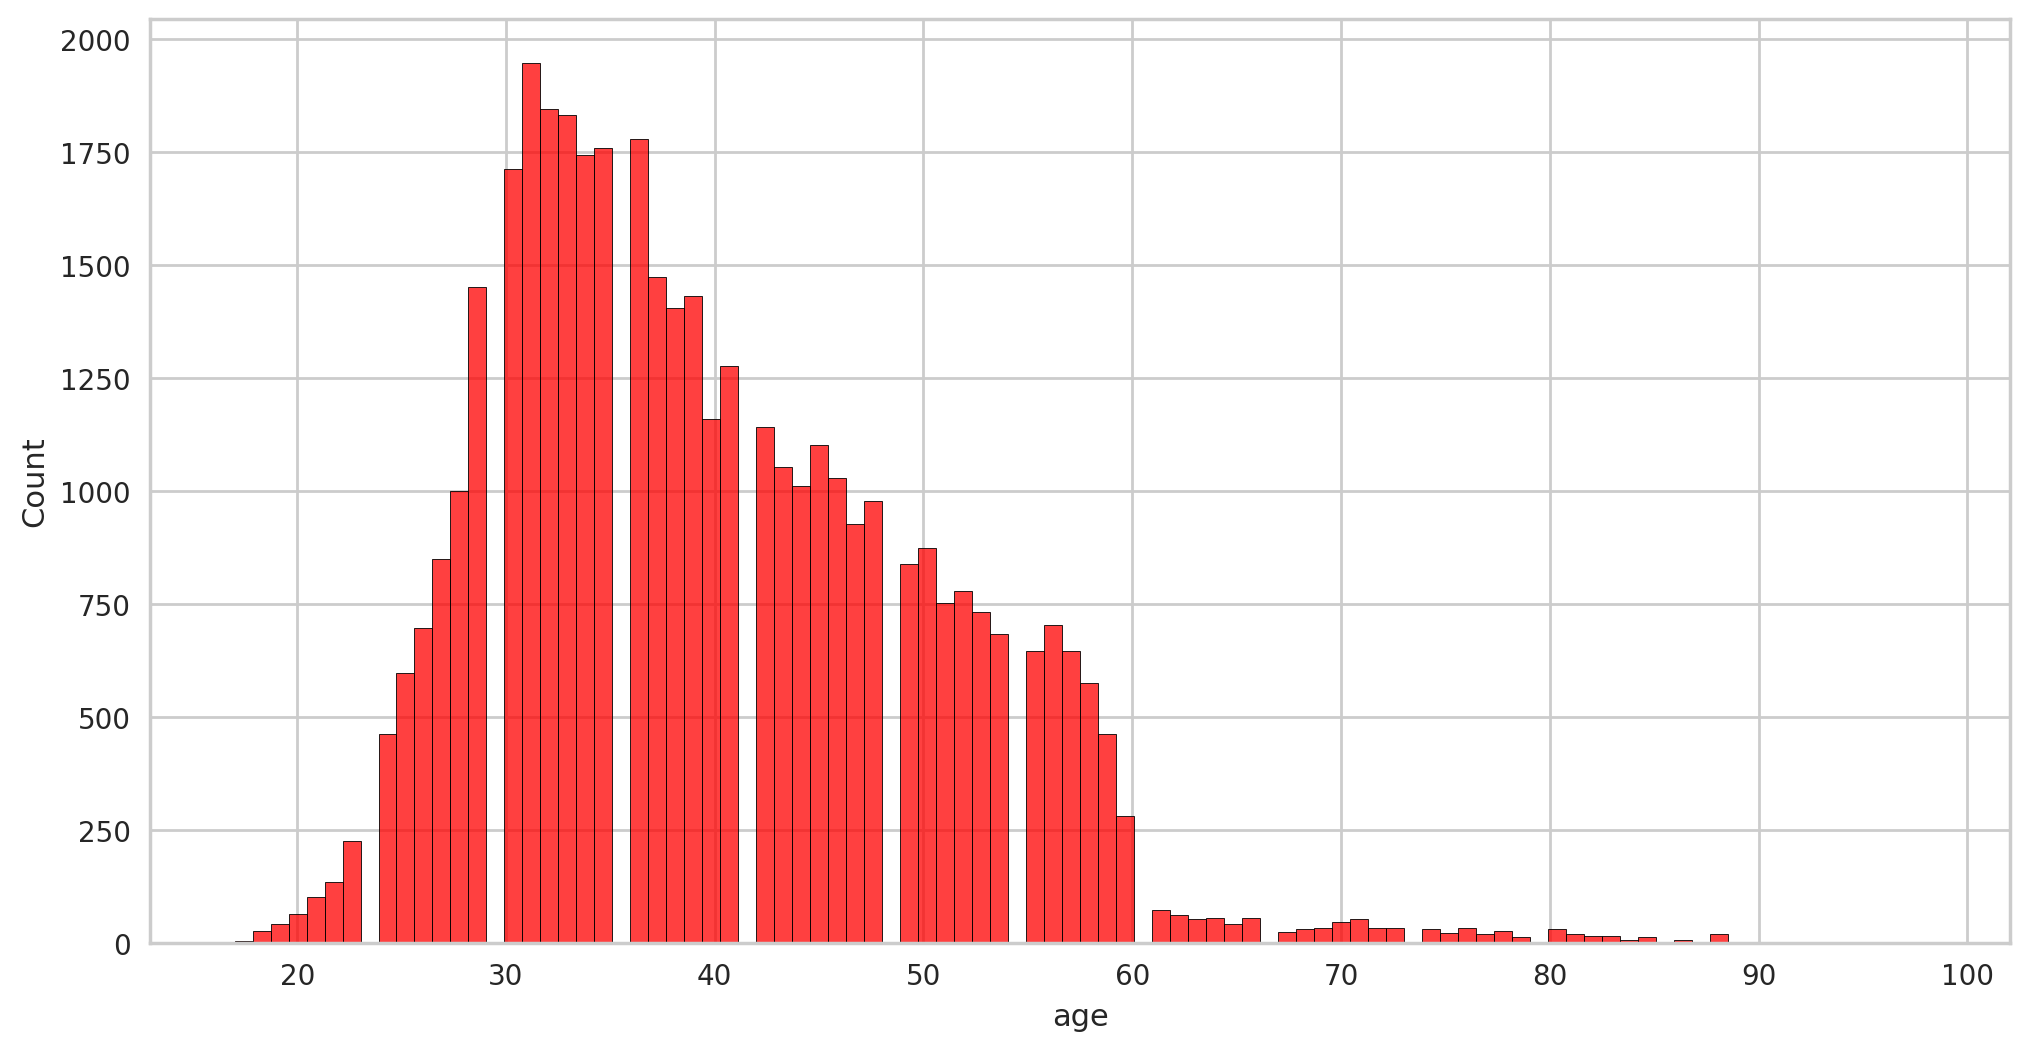

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="age",color="red")
plt.show()

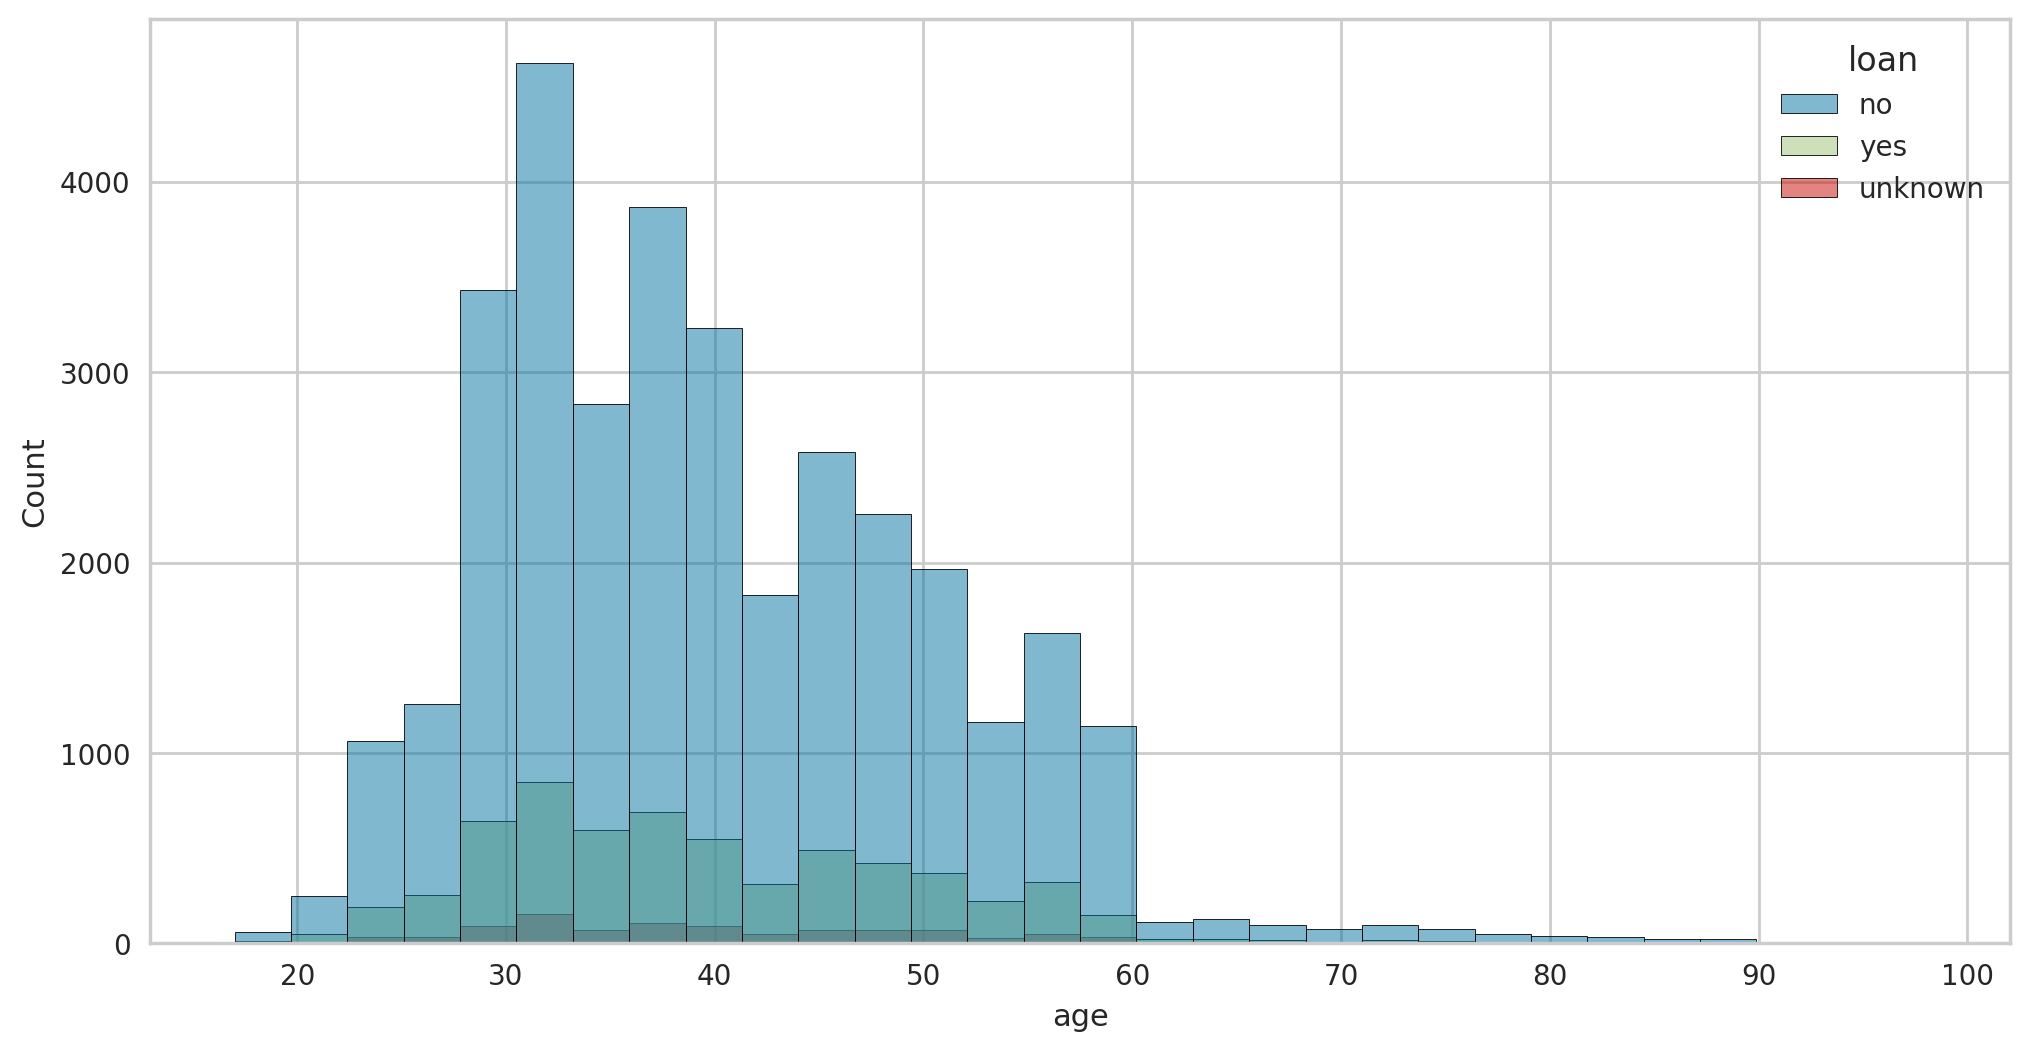

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="age",hue="loan",bins=30)
plt.show()

In [15]:
df_dummies = pd.get_dummies(df)

In [16]:
df_dummies

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


In [17]:
df_dummies.shape

(41188, 65)

In [18]:
scaler = StandardScaler()

In [19]:
df_scaled = scaler.fit_transform(df_dummies)

In [20]:
df_scaled[0]

array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
       -0.58202282, -0.53831699, -0.19143021,  6.15277204, -0.2764353 ,
       -0.2087573 , -0.18903213, -0.3265564 , -0.1473267 , -0.44244927,
       -0.15887166, -0.08987076, -0.35509663,  0.80763764, -0.62493754,
       -0.04411455,  2.97708361, -0.24274754, -0.41474269, -0.54809999,
       -0.0209096 , -0.38191849, -0.64753149, -0.20945296,  0.51371278,
       -0.51359953, -0.00853476,  1.10081447, -0.1569334 , -1.04887691,
        0.46173139, -0.1569334 , -0.42287213, -1.31826996,  1.31826996,
       -0.26127446, -0.42007603, -0.06662113, -0.45925282, -0.38504233,
       -0.11590677,  1.41115463, -0.33253245, -0.13319736, -0.11846175,
       -0.484371  ,  1.95899952, -0.51458089, -0.49439422, -0.4960667 ,
       -0.3392905 ,  0.39770593, -0.1857    ,  0.35630932, -0.35630932])

In [21]:
k_means_model = KMeans(n_clusters=2)

In [23]:
k_means_model.fit(df_scaled)

KMeans(n_clusters=2)

In [24]:
cluster_labels = k_means_model.predict(df_scaled)

In [25]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [26]:
df_dummies["cluster"] = cluster_labels

In [27]:
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1


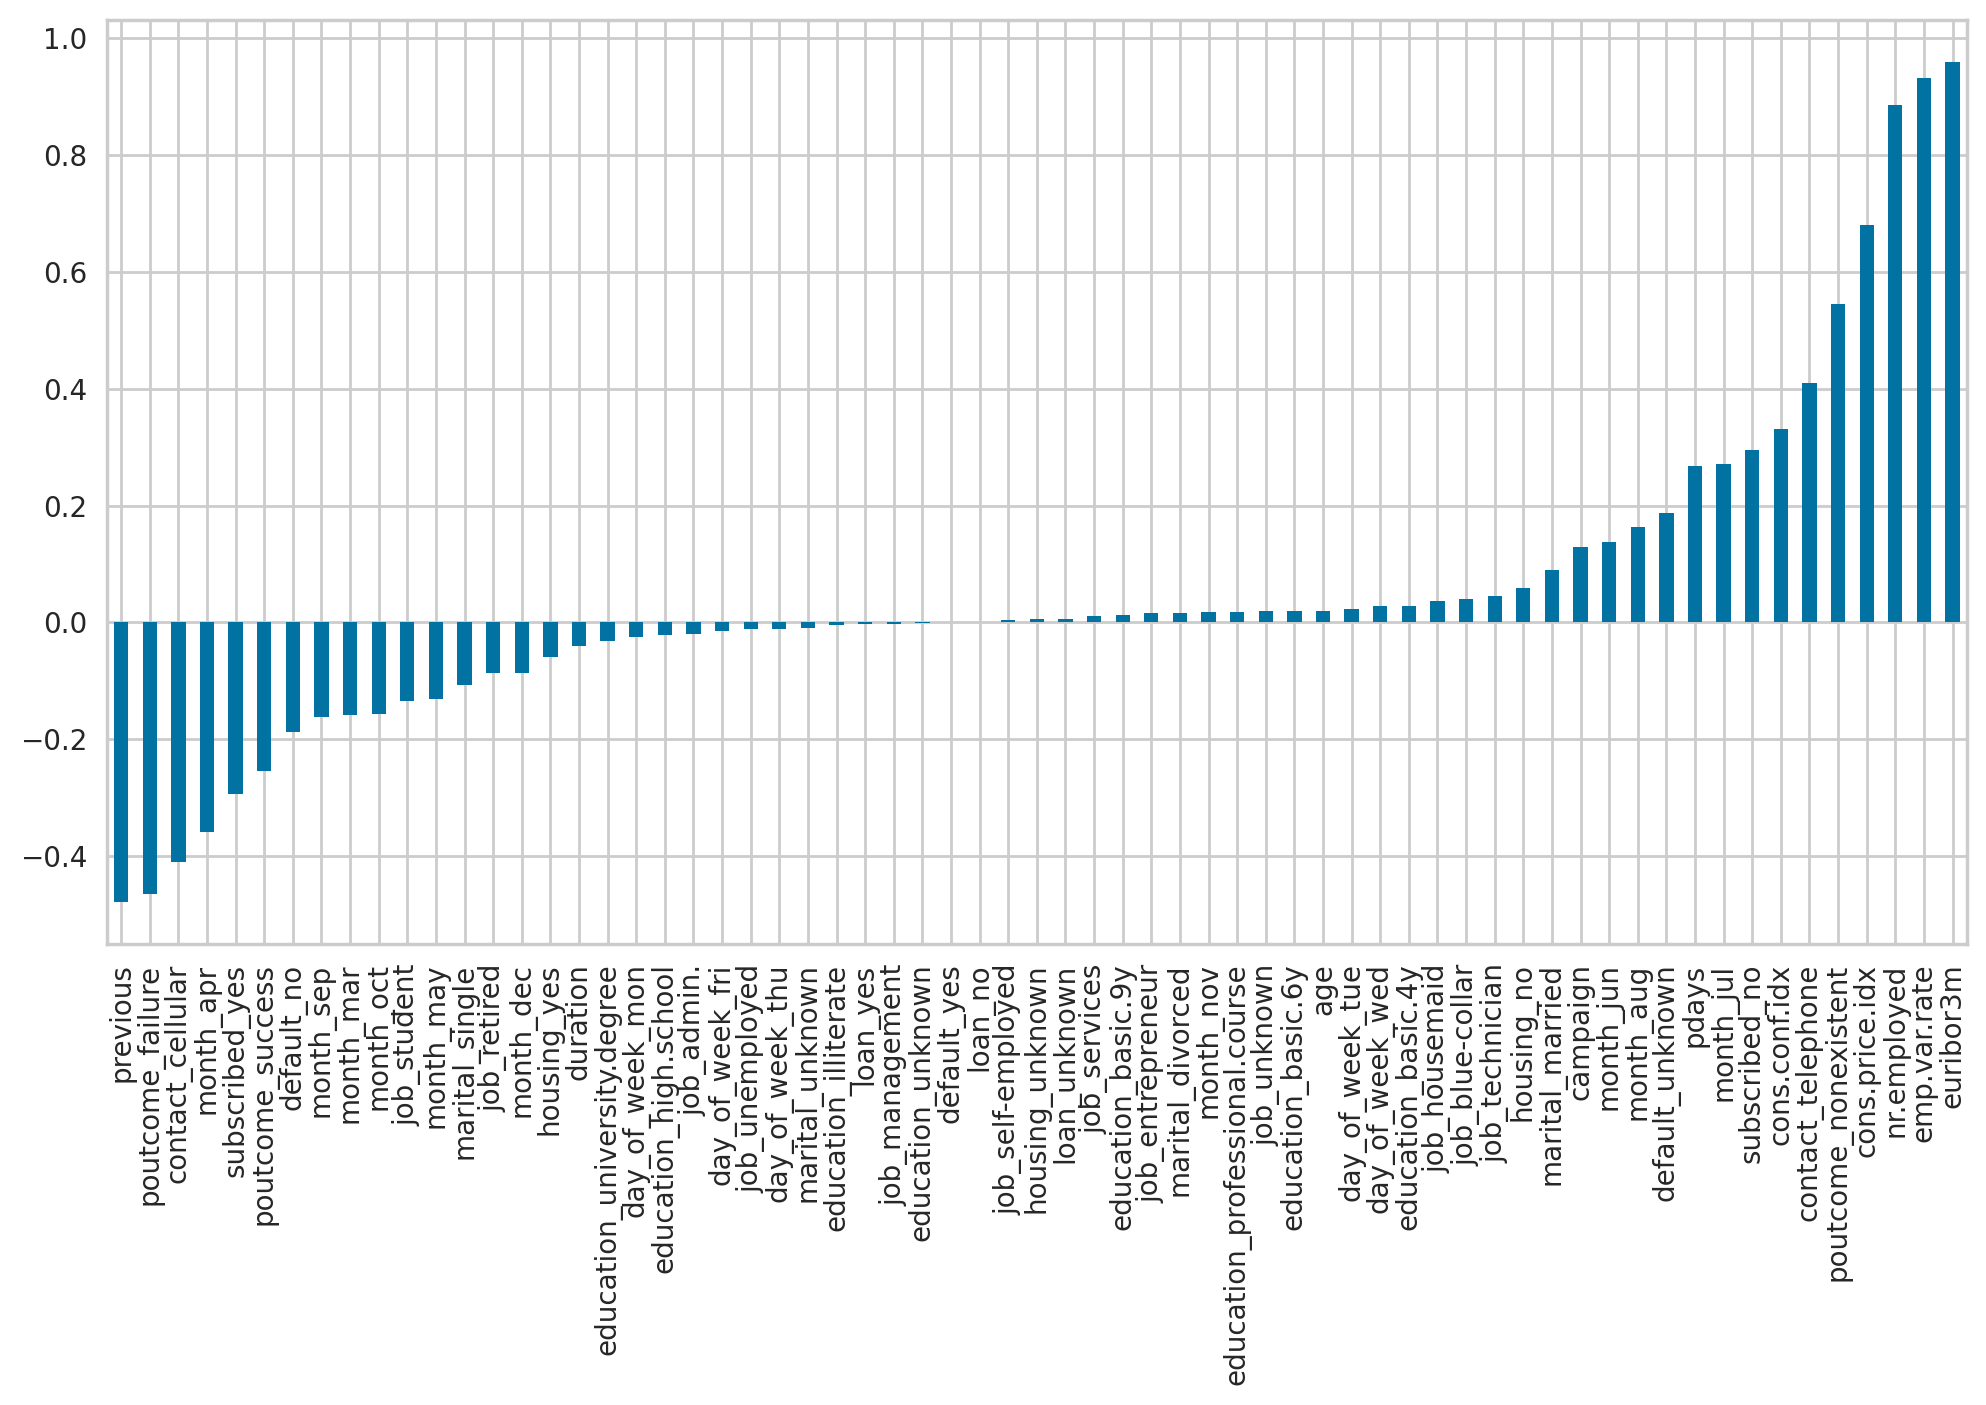

In [29]:
plt.figure(figsize=(12,6),dpi=200)
df_dummies.corr()["cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.show()

In [31]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(df_dummies)
    
    ssd.append(model.inertia_)

In [33]:
ssd

[2735461311.640845,
 1321035049.6208441,
 851056306.3152077,
 642597050.8018601,
 531440923.14148396,
 440298162.4617142,
 376937293.2543423,
 326257743.43844485]

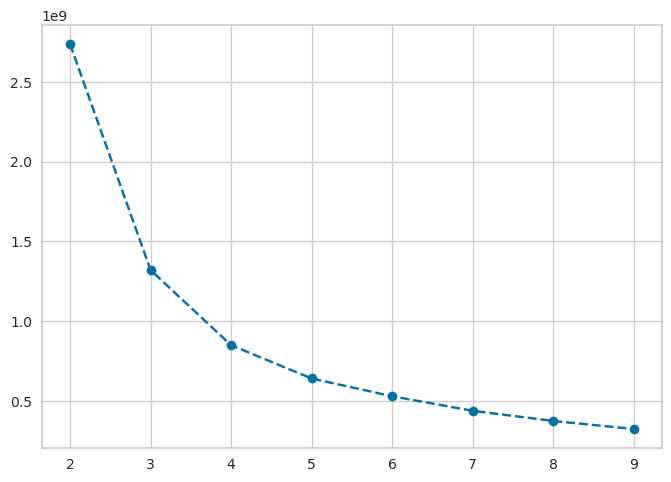

In [34]:
plt.plot(range(2,10),ssd,"o--")
plt.show()